Purpose of this notebook is to identify discrepancies between python2 and python3 implentations of booleannet. The 2017 ABA Model will be used as a case study due to familiarity (Karim is most familiar with this model)

In [1]:
%matplotlib inline
import os
import json
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

In [2]:
matplotlib.rcParams.update({'font.size': 22})


Load Knockout data generated by different implentations of booleannet.

Simulations results are generated via the parameters used for the ABA 2017 paper.  20 timesteps, 2500 runs.

In [3]:
with open('knockouts_py3.json', 'r') as f:
    knockouts_py3 = json.load(f)

In [4]:
with open('./py2Project/knockouts_py2.json', 'r') as f:
    knockouts_py2 = json.load(f)

Naive comparison of timeseries results from both implentations. Take the L1 norm of differences (sum of absolute differences) to compare simulations.

In [5]:
diff_sum = []
for key in knockouts_py3.keys():
    py2sim_data = np.array(knockouts_py2[key]['Timesteps']['Closure'])
    py3sim_data = np.array(knockouts_py3[key]['Timesteps']['Closure'])
    diff = LA.norm((py3sim_data - py2sim_data), 1)
    diff_sum.append(diff)

In [6]:
diff_df = pd.DataFrame({"target": list(knockouts_py3.keys()),
              "diff_sum": diff_sum})

Here, we see differences are rather small (1>). This is a good indication simulatons have comparable results.

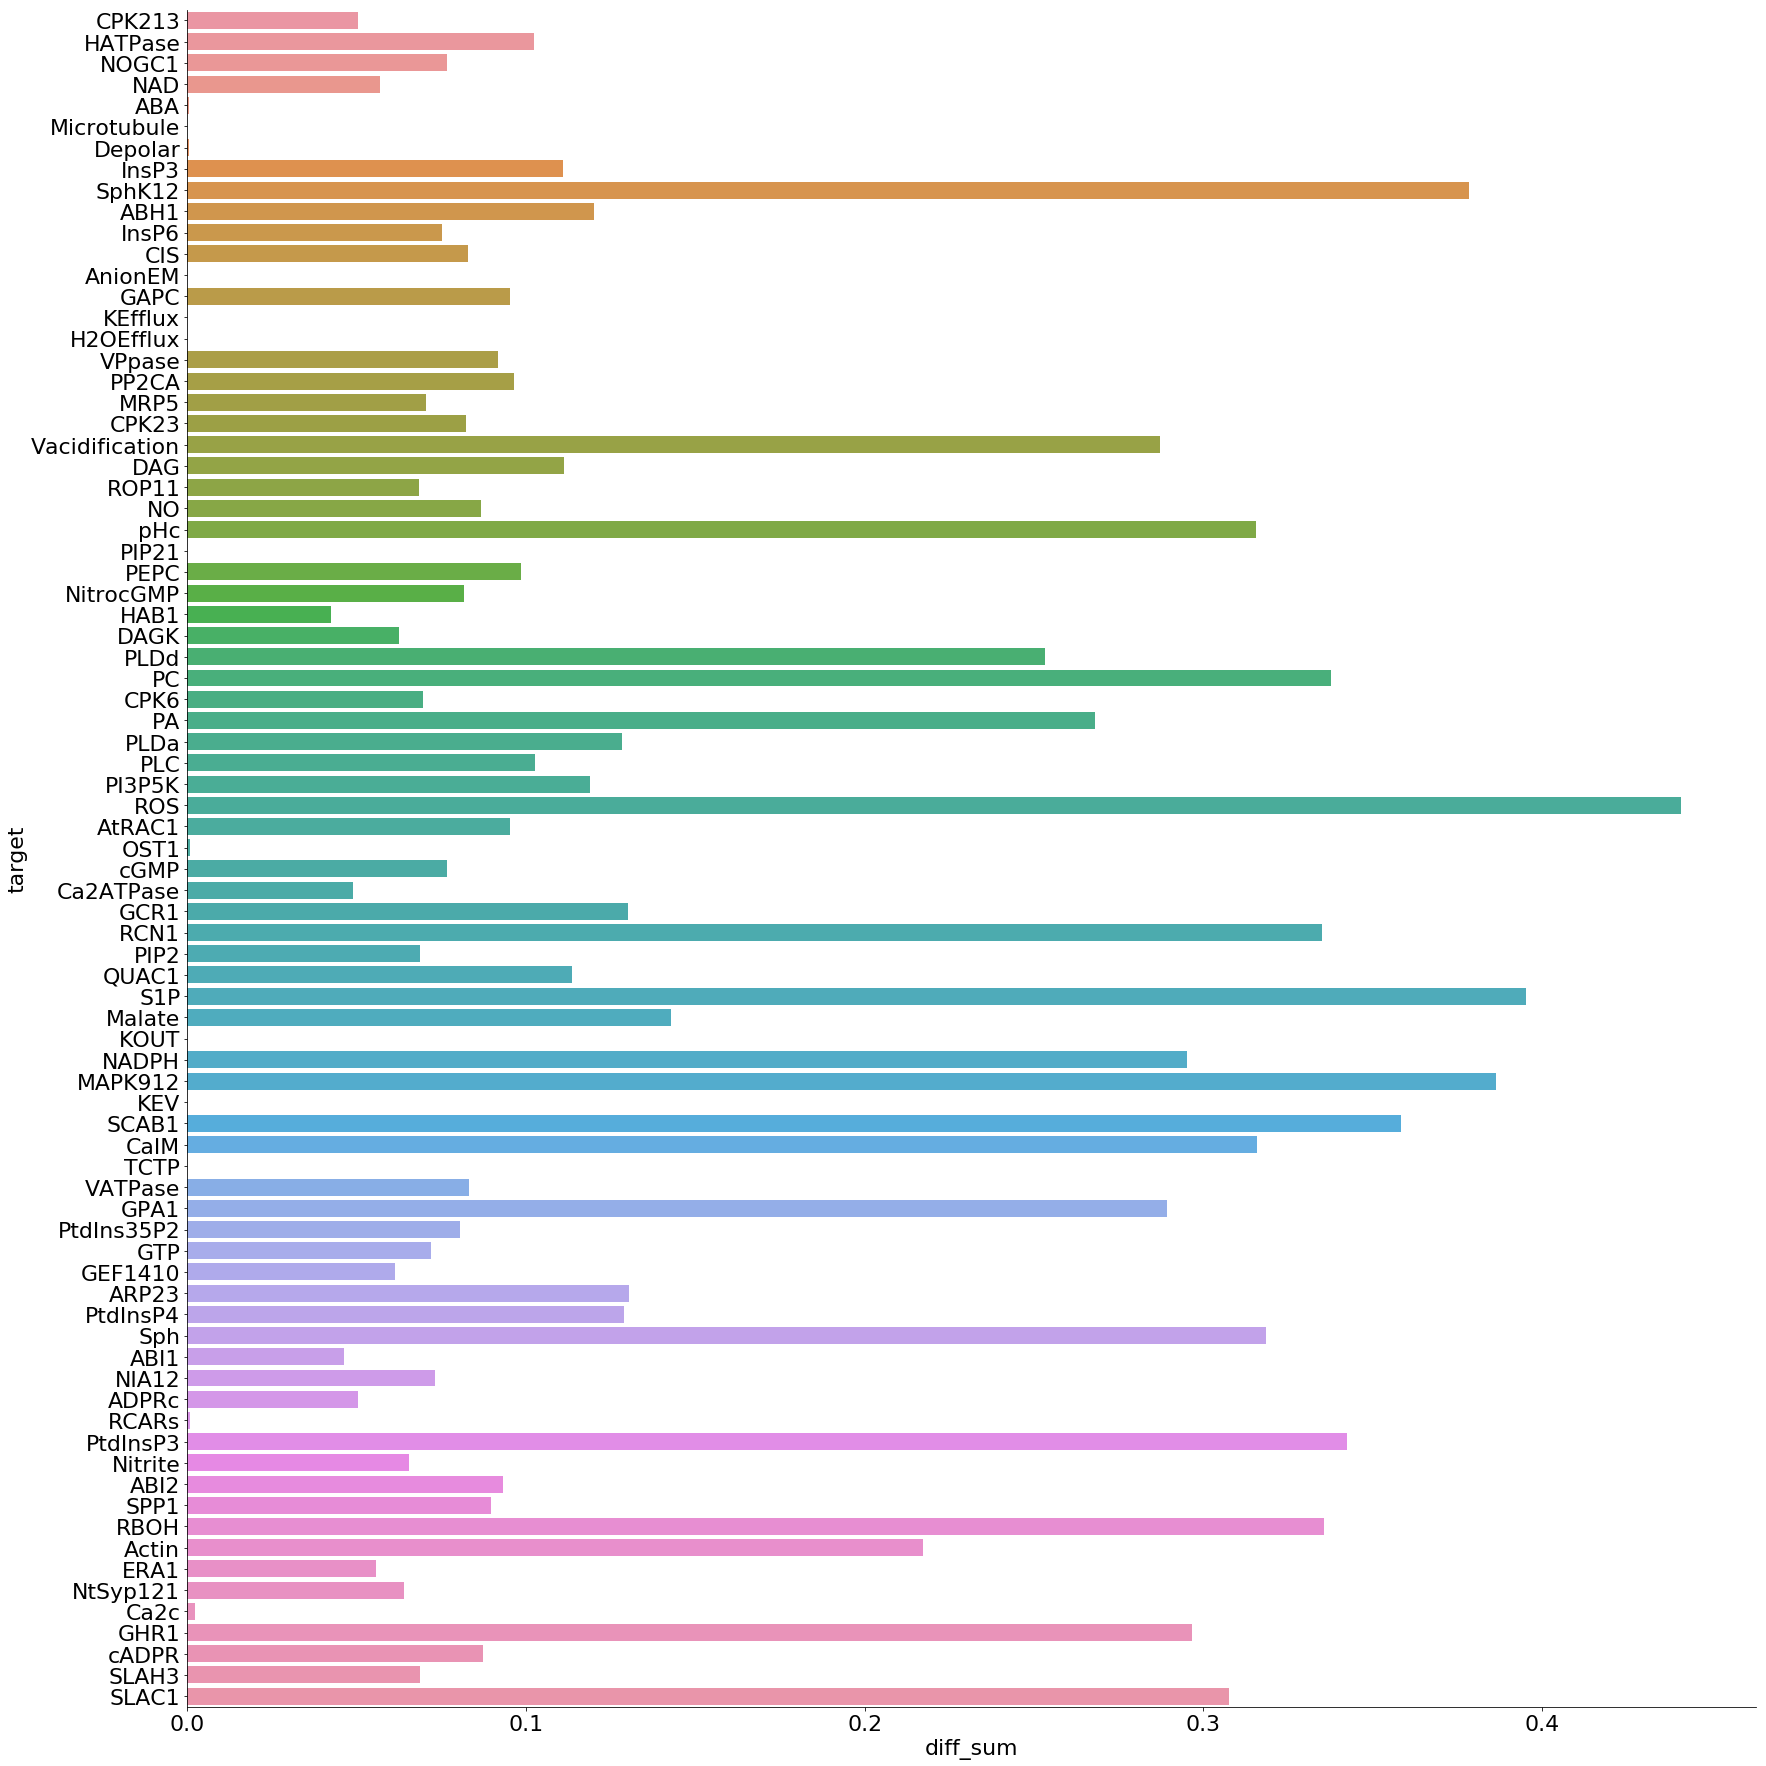

In [7]:
sns.factorplot(x='diff_sum', y='target', kind='bar',data=diff_df, size=25)

In [8]:
nodes = knockouts_py2.keys()

Timeseries between different node knockouts are similar upon visual inspection. Next steps is to compare Overexpression results.

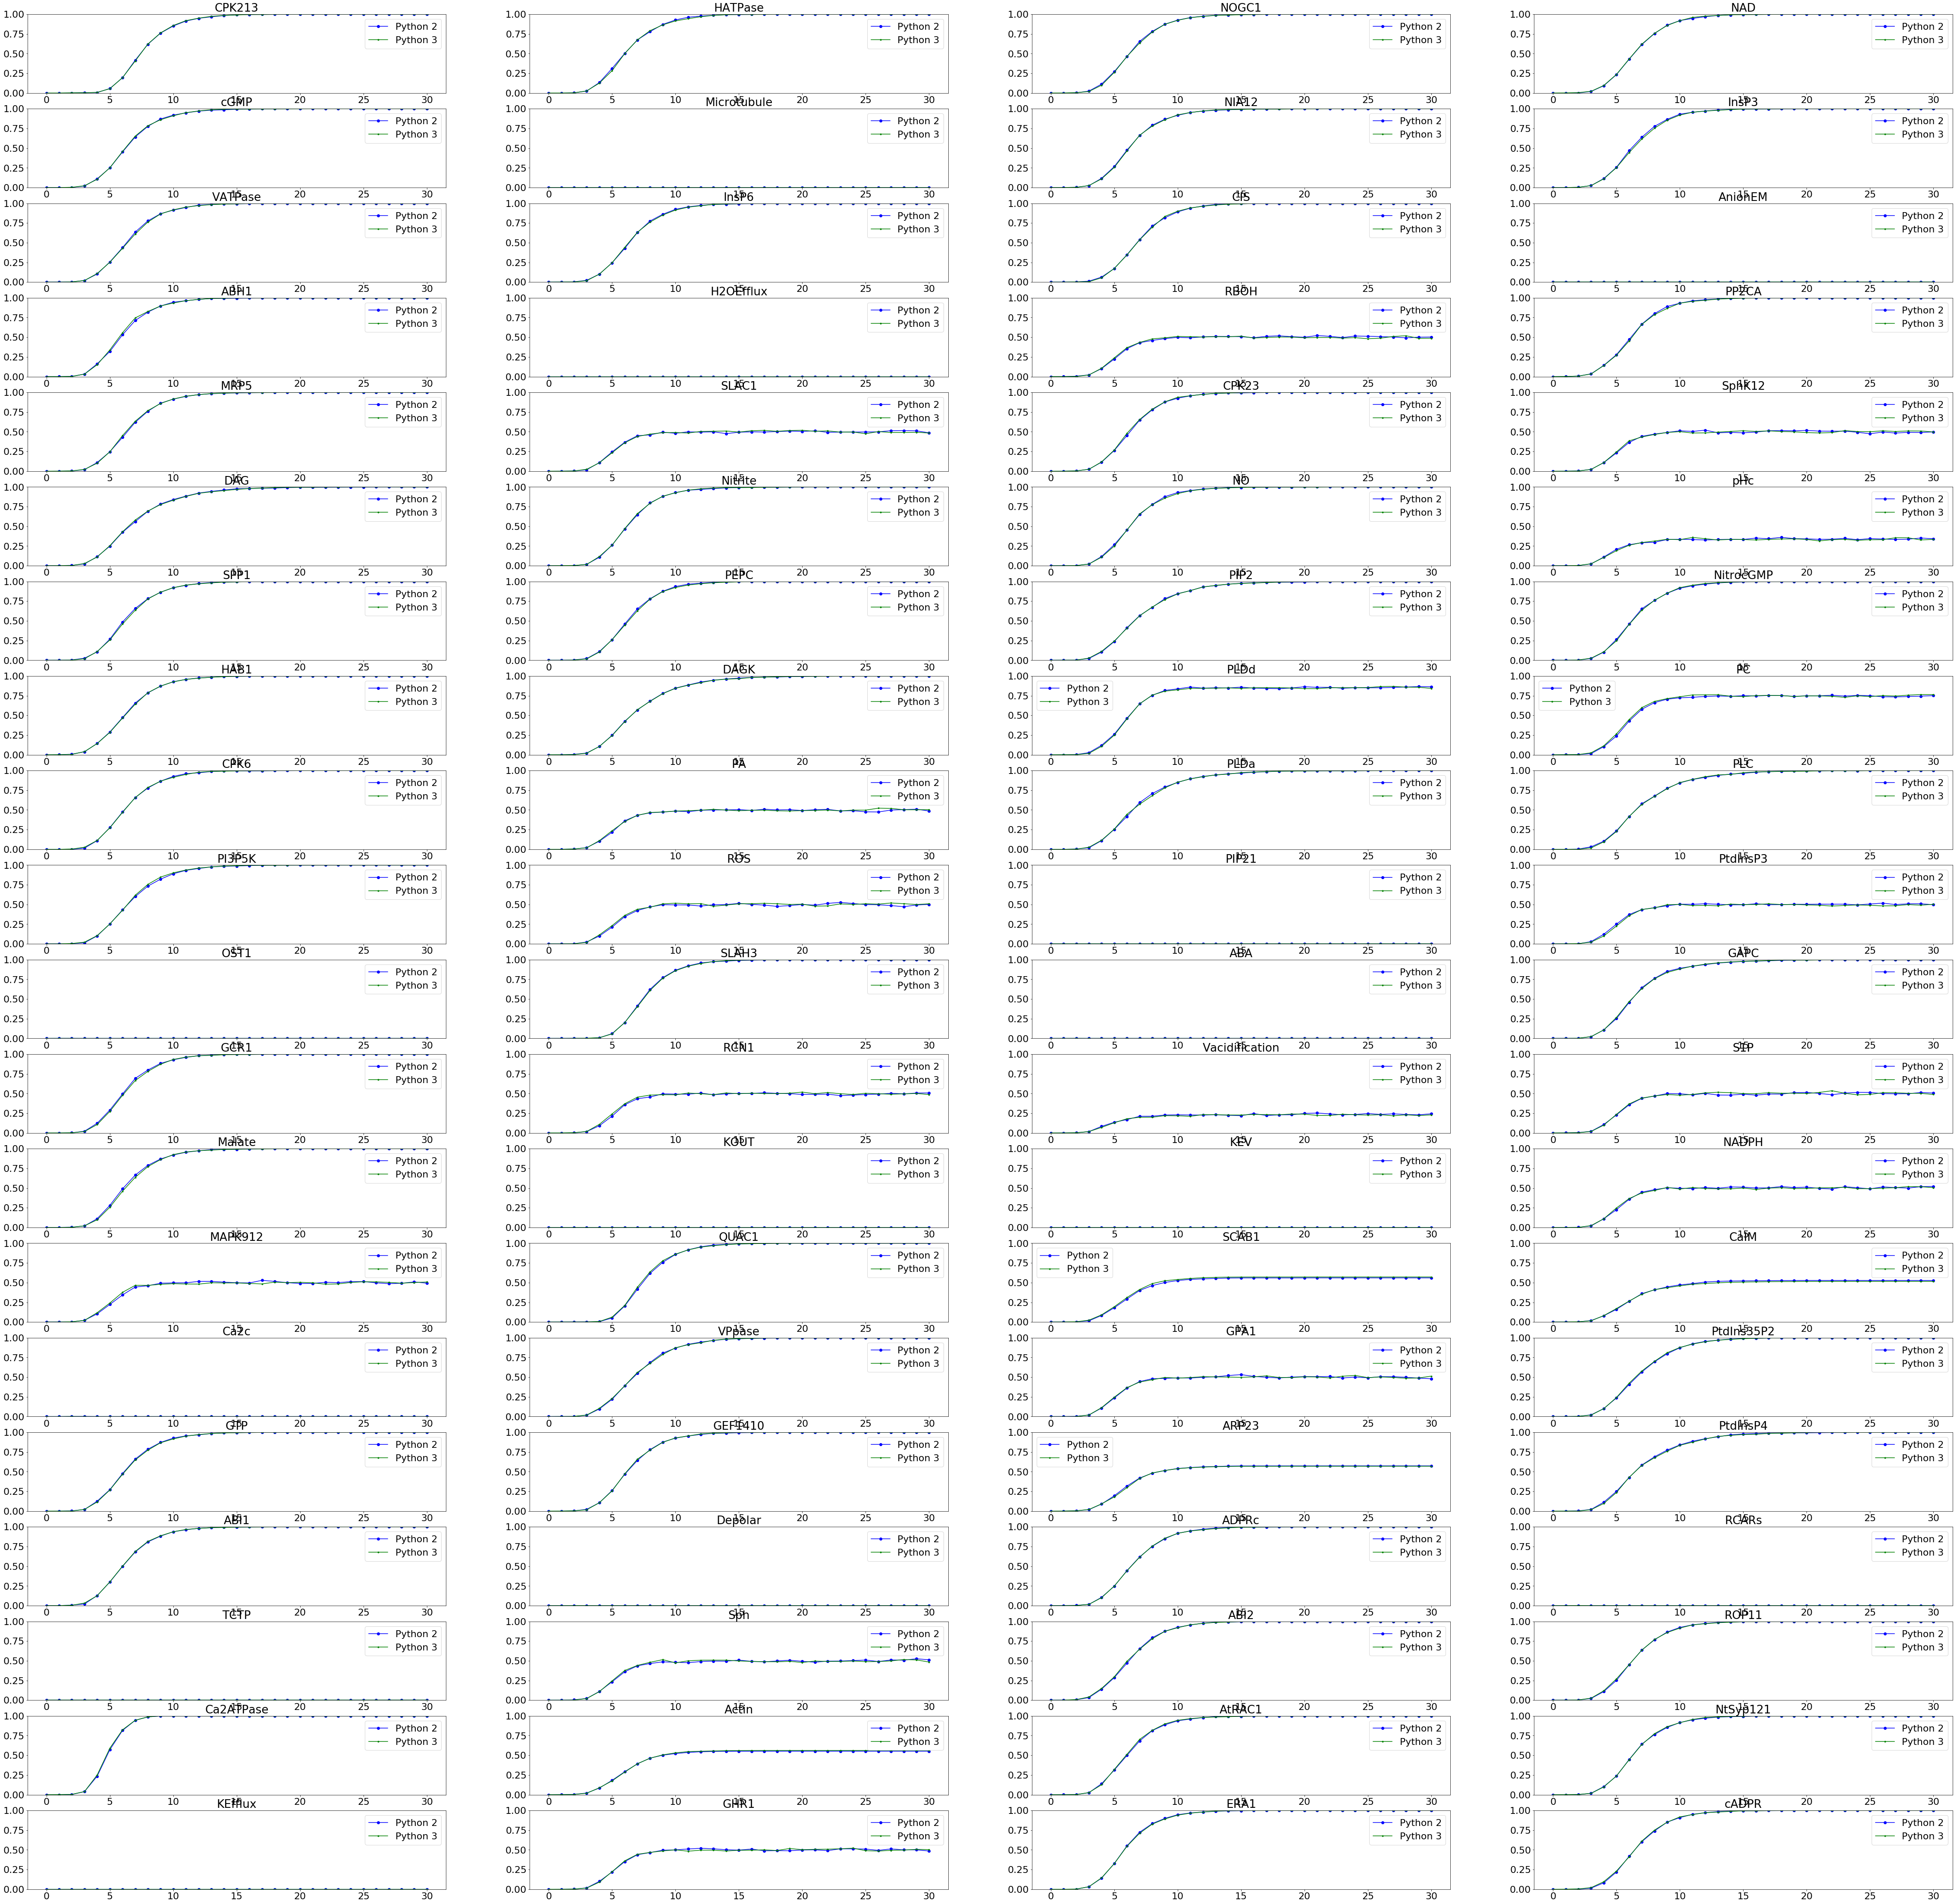

In [9]:
plt.figure(figsize=(80,80), facecolor='white')

plot_number = 1
for node in nodes:
    ax = plt.subplot(20, 4, plot_number)
    knock_py2 = knockouts_py2[node]['Timesteps']['Closure']
    knock_py3 = knockouts_py3[node]['Timesteps']['Closure']
    ax.plot(knock_py2, linestyle = '-', c='b', marker='o', label = 'Python 2')
    ax.plot(knock_py3, linestyle = '-', c='g', marker='.', label = 'Python 3')
    ax.set_title(node)
    ax.set_ylim(0,1)
    ax.legend()
    plot_number += 1

plt.show()